Т9

а) Проверить гипотезу о согласии данных с законом равномерного распределения с помощью критерия Хи-квадрат и с помощью критерия Колмогорова. Сравнить результаты

![a_pirson_1](a_pirson_1.jpg)

![a_pirson_2](a_pirson_2.jpg)

![a_kolmogorov_1](a_kolmogorov_1.jpg)

![a_kolnogorov_2](a_kolmogorov_2.jpg)

![a_comparing](a_comparing.jpg)

б) Проверить гипотезу о согласии данных с законом нормального распределения с помощью критерия Хи-квадрат (оценки неизвестных параметров определить численно, максимизируя функцию правдоподобия, построенную по группированной выборке) и с помощью критерия Колмогорова (распределение критерия оперделить бутстрапом). Сравнить результаты.

![b_1](b_1.jpg)

![b_2](b_2.jpg)

Максимизируя функцию правдоподобия (омпг) найдем параметры a и sigma

In [24]:
import numpy as np
from scipy import integrate
from scipy.optimize import minimize
import matplotlib.pyplot as plt

n=100

In [4]:
# Определение функции плотности нормального распределения
def normal_distribution(x, a, sigma):
    return 1/(sigma*(2*np.pi)**0.5)*np.exp(-(x-a)**2/(2*sigma**2))

# Определение функции логарифмической функции правдоподобия
def log_likelihood(params, x_values):
    a, sigma = params
    log_l = 0
    for interval in x_values:
        integrand = lambda x: normal_distribution(x, a, sigma)
        result, _ = integrate.quad(integrand, interval[0], interval[1])
        log_l += np.log(result**interval[2])
    return -log_l  # Минимизируем отрицательное значение логарифма правдоподобия

# Исходные данные
x_values = [(-np.inf, 1, 5), (1, 2, 8), (2, 3, 6), (3, 4, 12), (4, 5, 14), (5, 6, 18), (6, 7, 11), (7, 8, 6), (8, 9, 13), (9, np.inf, 7)]  # Заданные интервалы

# Поиск оптимальных значений параметров a и sigma, минимизируя отрицательное значение логарифма правдоподобия
initial_guess = [2, 3]  # Начальное предположение для a и sigma
result = minimize(log_likelihood, initial_guess, args=(x_values,))

# Вывод результатов
a_optimal, sigma_optimal = result.x

In [5]:
print("Оптимальное значение a:", a_optimal)
print("Оптимальное значение sigma:", sigma_optimal)

Оптимальное значение a: 5.289676778040092
Оптимальное значение sigma: 2.679519829955524


Посчитаем теперь вероятности для каждого интегрвала группированной выборки

In [6]:
a = 5.29
sigma = 2.68
x_values = [(-np.inf, 1, 5), (1, 2, 8), (2, 3, 6), (3, 4, 12), (4, 5, 14), (5, 6, 18), (6, 7, 11), (7, 8, 6), (8, 9, 13), (9, np.inf, 7)]  # Заданные интервалы

p_i=[]
for interval in x_values:
    integrand = lambda x: normal_distribution(x, a, sigma)
    result, _ = integrate.quad(integrand, interval[0], interval[1])
    p_i.append(np.round(result, 4))
p_i = np.array(p_i)
print("p_i:", p_i)
print("n*pi:", n*p_i)

p_i: [0.0547 0.0551 0.0866 0.1187 0.1418 0.1476 0.1338 0.1058 0.0728 0.0831]
n*pi: [ 5.47  5.51  8.66 11.87 14.18 14.76 13.38 10.58  7.28  8.31]


n>50

Все n*pi>5

Значит всё ОК с критерием Хи-квадрат (Пирсон)

In [7]:
x_values = np.array(x_values)
m_i = x_values[:,2] # фактическое распределение элементов выборки по интервалам
m_i

array([ 5.,  8.,  6., 12., 14., 18., 11.,  6., 13.,  7.])

In [8]:
#считаем оценку
delta = np.sum((m_i-(n*p_i))**2 / (n*p_i)) #оценка delta
delta

9.804391705896775

Теорема: если Н0 верна и оценка параметра есть ОМПГ, то delta стремится по распределению к Хи-квадрат(k-1-s), где s-размерность параметра

In [9]:
k = 10
s = 2

In [10]:
from scipy.stats import chi2

k_ = k-1-s
p_value = 1- chi2.cdf(delta, k_)

In [11]:
p_value

0.19993207544989078

0.2 > alpha = 0.05

=> НЕТ ОСНОВАНИЙ ОТВЕРГАТЬ H_0

C помощью критерия Колмогорова

ПАРАМЕТРИЧЕСКИЙ BOOTSTRAP для определения закона распределения delta

1) берем любую оценку параметра

2) генерируем N=50000 выборок по вероятностной модели с этим параметром

3) по каждой выборке считаем оценку и находим delta = sqrt(n)*sup(Fn_edf(x) - F(x, theta_*))

4) делаем вариационный ряд и считаем p-value как l/N где l - количество delta_i > delta_, 
delta_ - delta для исходной выборки

![b_3](b_3.jpg)

In [205]:
# исходная выборка
X = np.array([0]*5 + [1]*8 + [2]*6 + [3]*12 + [4]*14 + [5]*18 + [6]*11 + [7]*6 + [8]*13 + [9]*7) 

teta_ = (np.mean(X), (np.mean(X**2) - np.mean(X)**2) ** 0.5) #оценка параметра по исходной выборке

print(X)
print(teta_)

[0 0 0 0 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6
 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9]
(4.77, 2.5054141374231933)


In [206]:
XX = []
N = 50000 # мощность бутстрапа
n = 100 # объем выборки
for _ in range(N):
    XX.append(np.random.normal(*teta_, n))
XX = np.array(XX)

In [207]:
XX #выборки сгенерированные по закону параметризованному оценкой параметра ОММ

array([[ 6.47161068,  5.06459492,  1.18812866, ...,  3.26601983,
         3.7027445 ,  6.18499004],
       [ 1.74098561,  6.60433852,  6.65926857, ...,  4.60887781,
         8.56670175,  2.25607937],
       [ 9.85620095,  2.6901279 ,  2.28486541, ...,  5.73005732,
         2.76448189,  5.55515283],
       ...,
       [ 6.94899508,  2.82411154,  8.38024937, ...,  9.06849452,
         2.95731375,  6.90614606],
       [ 4.68162858,  2.63740022,  0.95881129, ...,  5.41726765,
        -0.39258655,  6.20140862],
       [ 6.43883709,  6.89906931,  3.34952912, ...,  3.7930383 ,
         3.71978327,  7.55603372]])

In [208]:
XX.shape

(50000, 100)

In [209]:
# Создание эмпирической функции распределения по выборке
import numpy as np

def ecdf_f(sample):
    sorted_sample = np.sort(sample)
    n = len(sorted_sample)
    ecdf_values = np.arange(0, n) / n
    result = np.column_stack((sorted_sample, ecdf_values))
    for i in range(1, n):
        if result[i, 0] == result[i-1, 0]:
            result[i, 1] = result[i-1, 1]
    return result


In [210]:
teta_XX = np.apply_along_axis(lambda x: ((np.mean(x), (np.mean(x**2) - np.mean(x)**2) ** 0.5)), axis=1, arr=XX)
teta_XX # оценка параметра для каждой сгенерированной выборки

array([[4.94307991, 2.14342016],
       [4.84721196, 2.58231785],
       [5.05580476, 2.31998279],
       ...,
       [4.94793671, 2.7132146 ],
       [4.75410368, 2.54545158],
       [4.8579549 , 1.9814368 ]])

In [211]:
teta_XX.shape 

(50000, 2)

In [212]:
#ЭМПИРИЧЕСКАЯ ФУНКЦИЯ РАСПРЕДЕЛЕНИЯ ПО КАЖДОЙ ВЫБОРКЕ
F_ecdf_X = np.apply_along_axis(lambda x: ecdf_f(x), axis=1, arr=XX)

In [213]:
F_ecdf_X.shape

(50000, 100, 2)

In [214]:
# Определение функции плотности нормального распределения
def normal_distribution(x, a, sigma):
    return 1/(sigma*(2*np.pi)**0.5)*np.exp(-(x-a)**2/(2*sigma**2))

In [215]:
def func_distr_normal(sample, teta): #функция распределения F(x) по заданной выборке и параметру
    a, sigma = teta
    integrand = lambda x: normal_distribution(x, a, sigma)
    result = []
    for x in np.sort(sample):
        #интегрирую плотность нормального распределения от -inf до каждого элемента выборки
        # так получим F(x, teta*), это НЕ эмпирическая ф-я распределения
        result_x, _ = integrate.quad(integrand, -np.inf, x) 
        result.append(result_x)
    return np.stack((np.sort(sample), np.array(result)), axis=-1)

Text(0.5, 1.0, 'Исходная выборка')

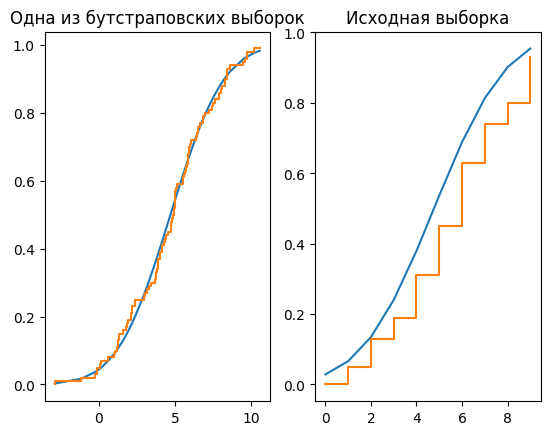

In [248]:
# тестирую функции

fig, ax = plt.subplots(1, 2)
# проверка что правильно строится функцию распределения нормального закона
ax[0].plot(func_distr_normal(XX[10], teta_XX[10])[:,0], func_distr_normal(XX[10], teta_XX[10])[:,1])
# и эмпирическая функция распределения по той же выборке (100й)
ax[0].step(ecdf_f(XX[10])[:,0], ecdf_f(XX[10])[:,1])
ax[0].set_title("Одна из бутстраповских выборок")

ax[1].plot(func_distr_normal(X, teta_)[:,0], func_distr_normal(X, teta_)[:,1])
ax[1].step(ecdf_f(X)[:,0], ecdf_f(X)[:,1], where='post')
ax[1].set_title("Исходная выборка")

In [259]:
#считаю delta для каждой бутстраповской выборки
sqrt_n = n**0.5

all_deltas = []
for i in range(len(XX)):
    ecdf = ecdf_f(XX[i])[:,1] #функция распределения нормального закона с параметром - оценкой из выборки
    fdn = func_distr_normal(XX[i], teta_XX[i])[:,1] #эмпирическая функция распределения
    
    #колмогоровская delta для выборки
    delta_i = sqrt_n* max(np.max(np.abs(ecdf - fdn)), 
                          np.max(np.abs(ecdf[:-1] - fdn[1:])), 
                          np.abs(1-ecdf[-1]))
    all_deltas.append(delta_i)

In [260]:
all_deltas = np.sort(all_deltas) # вариационный ряд
all_deltas.shape

(50000,)

In [273]:
teta_ = (np.mean(X), (np.mean(X**2) - np.mean(X)**2) ** 0.5)
ecdf = ecdf_f(X)[:,1] #эмпирическая функция распределения
fdn = func_distr_normal(X, teta_)[:,1] #функция распределения нормального закона с параметром - оценкой из выборки

#колмогоровская delta для выборки
delta_ = sqrt_n * max(np.max(np.abs(ecdf - fdn)), 
                      np.max(np.abs(ecdf[1:] - fdn[:-1])), 
                      np.abs(1-fdn[-1]))
delta_  #delta для исходной выборки

1.0133711124224798

In [274]:
# l - количество delta в вариационном ряде > оценки delta исходной выборки 
l = len([delta for delta in all_deltas if delta >= delta_])
print(l)
p_value = l/(N)
p_value

1103


0.02206

0.022 < 0.05 => ОТВЕРГАЕМ ГИПОТЕЗУ H_0

P_value Хи-квадрат: 0.2 - НЕТ ОСНОВАНИЙ ОТВЕРГАТЬ
    
p_value Колмогоров (бутстрап): 0.022 - УВЕРЕННО ОТВЕРГАЕМ